In [1]:
__nbid__ = '0050'
__author__  = 'Knut Olsen <knut.olsen@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['stripe82', 'nsc_dr2', 'decaps_dr1', 'des_dr1', 'des_dr2', 'des_sva1', 'gogreen_dr1', 'ls_dr8', 'ls_dr9', 'smash_dr1', 'smash_dr2', 'splus_dr1', 'splus_edr']
__keywords__ = ['image cutout', 'SIA', 'tutorial']

# Cómo utilizar el servicio Simple Image Access (SIA) para realizar recortes de imágenes

*Knut Olsen y equipo del laboratorio de datos Astro*

#### (_Traducción de [How_to_use_the_Simple_Image_Access_service.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SiaService/How_to_use_the_Simple_Image_Access_service.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen del notebook](#goals)
* [Avisos Legales y Atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [¿Qué es el servicio Acceso Simple a Imágenes?](#chapter1)
* [Uso de ejemplo](#chapter2)
* [Facilitando el proceso con funciones](#chapter3)

<a class="anchor" id="goals"></a>
# Objetivos
Muestra cómo utilizar la API del servicio Simple Image Access (SIA) para realizar recortes de imágenes.

# Resumen
En este notebook, describimos y demostramos la API del servicio SIA y la utilizamos para crear un conjunto de ejemplos de recortes de imágenes.  Enumeramos todas las colecciones de imágenes disponibles a través de los servicios SIA y luego seleccionamos una para recuperar un recorte de imagen en una AR y Declinación específicas en el cielo. Definimos una función para identificar la imagen más profunda disponible en una banda y posición específicas, recuperar recortes de imágenes de las bandas g, r e i en esa posición y crear una imagen en color de tres bandas a partir de los recortes.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# biblioteca estándar
from getpass import getpass
import warnings  
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning) # para silenciar las advertencias de Astropy

# De terceros
import numpy as np
from numpy.core.defchararray import startswith
import pylab as plt
import matplotlib
%matplotlib inline

from pyvo.dal import sia
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

# Del DataLab
from dl import queryClient as qc, storeClient as sc, authClient as ac

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Pero algunas capacidades, por ejemplo guardar los resultados de sus consultas en su espacio de almacenamiento virtual, requieren un inicio de sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab (deberá hacerlo para este notebook), elimine el comentario de la celda siguiente y ejecútela:

In [ ]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
ac.whoAmI()

<a class="anchor" id="chapter1"></a>
# ¿Qué es el servicio de Acceso Simple a Imágenes?
El servicio SIA es una herramienta para identificar el conjunto de imágenes en una colección de imágenes que se superponen a la posición en la que se desea recortar la imagen.  Devuelve una tabla de imágenes potenciales que contienen información (metadatos) que normalmente se encuentra en los encabezados de las imágenes (filtro, tiempo de exposición, tiempo de observación, etc.), así como una URL que apunta al recorte de la imagen.  Por lo tanto, obtener recortes de imágenes es un proceso de tres pasos: 1) elegir una colección de imágenes, 2) llamar al servicio SIA de esa colección para recuperar información sobre las imágenes que se superponen a una posición de interés y 3) recuperar los recortes de imágenes accediendo a las URL de las imágenes seleccionadas en la tabla de información.

La elección de una colección de imágenes específica se realiza seleccionando la URL que apunta a esa colección.  Hay muchas colecciones disponibles, incluidas imágenes de Dark Energy Survey, Legacy Surveys y todo el archivo de datos astronómicos de NOIRLab.

Para obtener más información sobre el protocolo SIA, consulte la [documentación de IVOA](http://www.ivoa.net/documents/SIA/http://www.ivoa.net/documents/SIA/) que lo describe.

In [2]:
# Lista de puntos de acceso del servicio Simple Image Access (SIA) para diferentes colecciones de imágenes

# El punto de acceso predeterminado apunta a todo el archivo público de datos Astro.
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia"
svc = sia.SIAService(DEF_ACCESS_URL)

# El Astro Data Archive es el punto de acceso predeterminado.  Contiene todos los datos públicos del archivo, incluidos
# imágenes sin procesar y procesadas, máscaras de calidad de datos, etc.
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

# El subconjunto de imágenes del Astro Data Archive que se superponen con SDSS Stripe 82
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_nsa"
svc_stripe82 = sia.SIAService(DEF_ACCESS_URL)
# Otros subconjuntos de imágenes específicas que se superponen con SDSS Stripe 82
# Para usarlos, llame a svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/calibrated"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/coadd"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/decaps_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_sva1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_y1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_y2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_y3"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_y4"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/ls_dr8"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/ls_dr9"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/nsc_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/raw"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/sdss_dr9"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/smash_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/splus_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/splus_edr"

# El subconjunto de imágenes calibradas por instrumentos del Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_all"
svc_cal = sia.SIAService(DEF_ACCESS_URL)
# Otras colecciones de imágenes calibradas por instrumentos para estudios específicos
# Para usarlos, llame a svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/des_y1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/des_y2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/des_y3"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/des_y4"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/nsa"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/smash_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/splus_dr1"

# El subconjunto de imágenes calibradas apiladas del Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_all"
svc_coadd = sia.SIAService(DEF_ACCESS_URL)
# Otras colecciones de imágenes apiladas pare surveys específicas
# Para usarlos, llame a svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/des_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/des_sva"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/decaps_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/ls_dr8"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/ls_dr9"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/nsa"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/smash_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/splus_dr1"

# El subconjunto de imágenes sin procesar y no calibradas del Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw_all"
svc_raw = sia.SIAService(DEF_ACCESS_URL)
# Otras colecciones de imágenes sin procesar y no calibradas pare surveys específicas
# Para usarlos, llame a svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw/nsa"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw/smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw/smash_dr2"

# Imágenes DECam del DECam Plane Survey DR1
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/decaps_dr1"
svc_decaps_dr1 = sia.SIAService(DEF_ACCESS_URL)

# La publicación de imágenes Dark Energy Survey DR1 contiene imágenes de los primeros tres años de DES.
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr1"
svc_des_dr1 = sia.SIAService(DEF_ACCESS_URL)

# La publicación de imágenes de Dark Energy Survey DR2 contiene imágenes del período DES DR2
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr2"
svc_des_dr2 = sia.SIAService(DEF_ACCESS_URL)

# La publicación de imágenes de Dark Energy Survey DR2 SE contiene imágenes del período DES DR2 SE
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr2_se"
svc_des_dr2_se = sia.SIAService(DEF_ACCESS_URL)

# La publicación de imágenes de Dark Energy Survey SV contiene imágenes del período DES SV
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_sva1"
svc_des_sva1 = sia.SIAService(DEF_ACCESS_URL)

# El subconjunto de imágenes DR1 del Dark Energy Survey obtenidas en el primer año de DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y1"
svc_des_y1 = sia.SIAService(DEF_ACCESS_URL)

# El subconjunto de imágenes DR1 del Dark Energy Survey obtenidas en el segundo año de DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y2"
svc_des_y2 = sia.SIAService(DEF_ACCESS_URL)

# El subconjunto de imágenes DR1 del Dark Energy Survey obtenidas en el tercer año de DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y3"
svc_des_y3 = sia.SIAService(DEF_ACCESS_URL)

# El subconjunto de imágenes DR1 del Dark Energy Survey obtenidas en el cuarto año de DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y4"
svc_des_y4 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes de GOGREEN DR1
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/gogreen_dr1"
svc_gogreen_dr1 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes DECam de Legacy Surveys DR8
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr8"
svc_ls_dr8 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes DECam de Legacy Surveys DR9
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr9"
svc_ls_dr9 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes DECam del catálogo fuente DR2 de NOIRLab
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsc_dr2"
svc_nsc_dr2 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes del Sloan Digital Sky Survey DR9
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/sdss_dr9"
svc_sdss_dr9 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes DECam de la versión SMASH Survey DR1
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/smash_dr1"
svc_smash_dr1 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes DECam de la versión SMASH Survey DR2
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/smash_dr2"
svc_smash_dr2 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes del telescopio T80S del lanzamiento del S-PLUS DR1
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/splus_dr1"
svc_splus_dr1 = sia.SIAService(DEF_ACCESS_URL)

# Imágenes del telescopio T80S del lanzamiento de S-PLUS EDR
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/splus_edr"
svc_splus_edr = sia.SIAService(DEF_ACCESS_URL)

<a class="anchor" id="chapter2"></a>
# Ejemplo de uso
Elegiremos una ubicación en Stripe 82 y utilizaremos el servicio SIA específico de Stripe 82 para recuperar un recorte de imagen de 6x6 minutos de arco de tamaño.  Usamos el método de búsqueda del objeto de servicio SIA para realizar la búsqueda y devolvemos el resultado como un objeto tabla de astropy. El método de búsqueda toma como argumentos una tupla que contiene (ar, dec) y una segunda tupla con el tamaño del recorte en cada dirección.  La búsqueda funciona en AR y Dec en grados y no tiene en cuenta la convergencia de líneas de AR hacia los polos, por lo que agregamos un término cos(dec) en el término de tamaño de AR.

In [3]:
ra = 335.0 # en grados
dec = 0.0 # en grados
fov = 0.1 # en grados

imgTable = svc_stripe82.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()

El resultado es una tabla de metadatos para imágenes que se superponen a la posición de búsqueda:

In [4]:
imgTable

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20161005t022147,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161005_022410_opi_r_v1.fits.fz&extn=31&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,285862,,,2,0,0,2,[24 1993],,,[0.26984],,ct4m20161005t022147,,2012B-0001,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_161005_022410_opi_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161005_022410_opi_r_v1.fits.fz&extn=31&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,334.875,-0.0735691,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,DES survey hex -251-4 tiling 7,1.16,2012B-0001,30.154,image,0.638,0,,90,,Resampled,2016-10-05T02:21:47.555152,557666.09846707,0
ct4m20161105t002623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161105_002844_ood_Y_v1.fits.fz&extn=31&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,6747,,,2,0,0,2,[8 4094],,,[-0.13209],,ct4m20161105t002623,,2012B-0001,archival,,,DECam,Y,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_161105_002844_ood_Y_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161105_002844_ood_Y_v1.fits.fz&extn=31&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,334.874,-0.0729929,--,,,--,1130.0,1130.0,--,--,--,--,--,--,,,,DES survey hex -251-4 tiling 7,1.16,2012B-0001,28.718,dqmask,0,0,,90,,InstCal,2016-11-05T00:26:23.575547,557697.01832842,0
ct4m20161105t002623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161105_002844_oki_Y_v1.fits.fz&extn=31&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,308505,,,2,0,0,2,[24 4094],,,[-0.13209],,ct4m20161105t002623,,2012B-0001,archival,,,DECam,Y,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_161105_002844_oki_Y_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161105_002844_oki_Y_v1.fits.fz&extn=31&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,334.874,-0.0729929,--,,,--,1130.0,1130.0,--,--,--,--,--,--,,,,DES survey hex -251-4 tiling 7,1.16,2012B-0001,28.718,image,0,0,,90,,SkySub,2016-11-05T00:26:23.575547,557697.01832842,0
ct4m20161105t002623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161105_002844_ooi_Y_v1.fits.fz&extn=31&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,308503,,,2,0,0,2,[24 4094],,,[-0.13209],,ct4m20161105t002623,,2012B-0001,archival,,,DECam,Y,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_161105_002844_ooi_Y_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161105_002844_ooi_Y_v1.fits.fz&extn=31&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,334.874,-0.0729929,--,,,--,1130.0,1130.0,--,--,--,--,--,--,,,,DES survey hex -251-4 tiling 7,1.16,2012B-0001,28.718,image,0,0,,90,,InstCal,2016-11-05T00:26:23.575547,557697.01832842,0
ct4m20161105t002623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_161105_002844_oow_Y_v1.fits.fz&extn=31&POS=335.

La columna `access_url` contiene el enlace para recuperar el recorte de la imagen.  Podemos filtrar la tabla en cualquiera de las columnas para limitar la lista sólo a los recortes que queremos.  Aquí seleccionaremos imágenes apiladas (`proctype=Stack` y `prodtype=image`) observadas en el filtro g (`obs_bandpass` comienza con la letra 'g'):

In [5]:
sel = (imgTable['proctype'] == 'Stack') & (imgTable['prodtype'] == 'image') & \
    (startswith(imgTable['obs_bandpass'].astype(str),'g'))

Elegiremos una fila de la tabla filtrada y recuperaremos la imagen.

In [6]:
row = imgTable[sel]
row

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20150718t072406,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_150718_072640_osi_g_v1.fits.fz&extn=5&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,378061,,,3,0,0,2,[24 8874],,,[0.26996],,ct4m20150718t072406,,2015A-0619,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_150718_072640_osi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_150718_072640_osi_g_v1.fits.fz&extn=5&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,334.966,0.110729,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,lba334,1.16,2015A-0619,29.867,image,0,5.5311,,4500,,Stack,2015-07-18T07:24:06.639994,557221.30841018,0
ct4m20130905t015144,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130905_015144_osi_g_v1.fits.fz&extn=5&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,755777,,,3,0,0,2,[24 14041],,,[0.26996],,ct4m20130905t015144,,2012B-0001,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_130905_015144_osi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130905_015144_osi_g_v1.fits.fz&extn=5&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,334.51,0.206537,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,DES survey hex -251+16 tiling 3,1.39,2012B-0001,29.773,image,0,6.28075,,450,,Stack,2013-09-05T01:51:44.997190,556540.07760413,0
,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_140512_085654_osi_g_v1.fits.fz&extn=4&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,358810,,,3,0,0,2,[24 9025],,,[0.26995],,,,2014A-0429,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_140512_085654_osi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_140512_085654_osi_g_v1.fits.fz&extn=4&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,335.017,0.319923,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,md09,1.55,2014A-0429,28.1956,image,0,4.76613,,540,,Stack,2014-05-12T08:55:04.244386,556789.3715769,0.12738
ct4m20130905t015351,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130905_015351_osi_g_v1.fits.fz&extn=9&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,623148,,,3,0,0,2,[32 11969],,,[0.26974],,ct4m20130905t015351,,2012B-0001,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_130905_015351_osi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130905_015351_osi_g_v1.fits.fz&extn=9&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,335.11,0.322903,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,DES survey hex -235+6 tiling 3,1.39,2012B-0001,29.813,image,0,6.15155,,270,,Stack,2013-09-05T01:53:51.911652,556540.07907305,0


In [7]:
row = imgTable[sel][1]
url = row['access_url'] # obtener la URL de descarga
filename = download_file(url,cache=True,show_progress=False,timeout=120)
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
wcs = WCS(hdr)

Luego mostraremos la imagen.  Tenga en cuenta que es posible que la imagen no sea cuadrada por diversos motivos, como que el recorte de la imagen se topó con el borde de un chip a lo largo de un eje.

45.37442 14453.205 (1335, 752)


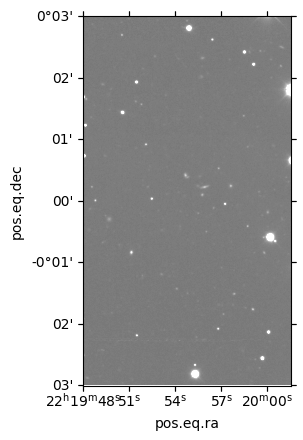

In [8]:
print(image.min(),image.max(),image.shape)
ax = plt.subplot(projection=wcs)
ax.imshow(image,cmap='gray',vmin=image.min(),vmax=image.min()+(image.max()-image.min())/100.)
plt.show()

### Superposición de catálogo
También podemos consultar la base de datos en busca de objetos del catálogo y superponerlos fácilmente en el recorte de la imagen.  En este ejemplo, consultamos la posición central de los objetos en la tabla de objetos DR2 del catálogo fuente de NOIRLab:

In [9]:
sql = '''SELECT ra, dec, gmag 
            FROM nsc_dr2.object 
            WHERE Q3C_RADIAL_QUERY(ra,dec,{0},{1},{2})
            AND gerr < 0.1 AND gmag < 22
'''.format(ra, dec, fov/2)
df = qc.query(sql=sql, fmt='pandas')

Aquí usaremos las magnitudes de banda *g* del objeto para controlar los tamaños de los marcadores.

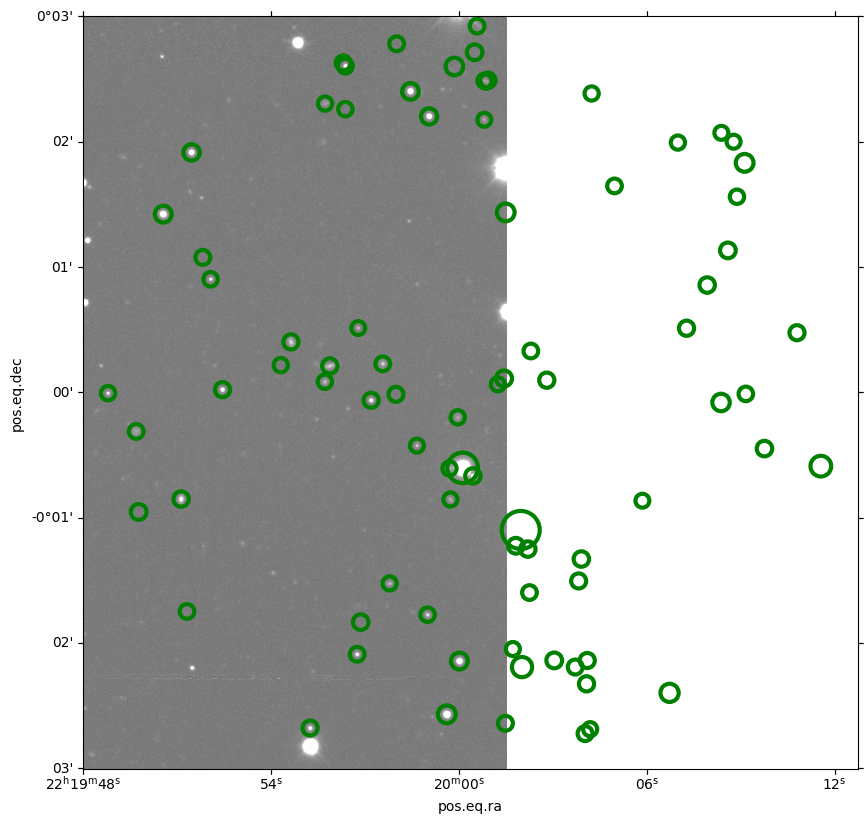

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(image, cmap='gray', vmin=image.min(), vmax=image.min()+(image.max()-image.min())/100.)
ax.scatter(df['ra'], df['dec'], transform=ax.get_transform('icrs'), s=1000./(df['gmag']-12), 
           edgecolor='green', facecolor='none', linewidths=3)
plt.show()

## Guardar imagen en VOSpace
Si no tiene la intención de mostrar o trabajar con la imagen en el notebook, sino que desea guardar la imagen como un archivo, storeClient puede copiar la URL recortada directamente a VOSpace.

Primero comprobaremos que hemos iniciado sesión:

In [11]:
ac.whoAmI() # Si el resultado es "anónimo", deberá iniciar sesión con ac.login()

'demo01'

Luego guarde el contenido de la URL de la imagen recortada en VOSpace:

In [12]:
sc.load('cutout.fits',url)

'OK'

In [13]:
print(sc.ls('cutout.fits',format='long'))

-rw-rw-r-x  demo01  4037760  16 Dec 2021 14:45  cutout.fits



<a class="anchor" id="chapter3"></a>
# Facilitando el proceso con funciones
El flujo de trabajo de ejemplo anterior se presta para escribir una función breve para acceder al servicio SIA, filtrar la tabla de metadatos para limitar el resultado de la búsqueda y recuperar el recorte.  Aquí escribimos una función para obtener la imagen apilada más profunda para una colección y banda de imágenes determinadas, y otra función para graficar las imágenes.

In [14]:
# Una pequeña función para descargar las imágenes apiladas más profundas.
# adaptado de R. Nikutta
def download_deepest_image(ra,dec,svc=sia.SIAService('https://datalab.noirlab.edu/sia'),fov=0.1,band='g'):
    imgTable = svc.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()
    
    sel0 = startswith(imgTable['obs_bandpass'].astype(str),band)
    print("La lista completa de imágenes contiene", len(imgTable[sel0]), "entradas con banda = "+band)

    sel = sel0 & ((imgTable['proctype'] == 'Stack') & (imgTable['prodtype'] == 'image')) # selección básica
    Table = imgTable[sel] # seleccionar
    if (len(Table)>0):
        row = Table[np.argmax(Table['exptime'].data.data.astype('float'))] # Elija la imagen con el tiempo de exposición más largo.
        url = row['access_url'] # obtener la URL de descarga
        print ('descargando la' + band + 'imagen más profunda...')
        image = fits.getdata(download_file(url,cache=True,show_progress=False,timeout=120))

    else:
        print ('No hay imagen disponible.')
        image=None
        
    return image

In [15]:
# Graficador de imágenes de múltiples paneles
def plot_images(images,geo=None,panelsize=4,bands=list('gri'),cmap=matplotlib.cm.gray_r):
    n = len(images)
    if geo is None: geo = (n,1)
        
    fig = plt.figure(figsize=(geo[0]*panelsize,geo[1]*panelsize))
    for j,img in enumerate(images):
        ax = fig.add_subplot(geo[1],geo[0],j+1)
        if img is not None:
            print(img.min(),img.max())
            vmin = np.median(img)-2*np.std(img)
            vmax = np.median(img)+2*np.std(img)
            ax.imshow(img,origin='lower',interpolation='none',cmap=cmap,vmin=vmin, vmax=vmax)
            ax.set_title('%s banda' % bands[j])
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

Ejecutamos la función para obtener recortes de la pila profunda en las bandas g, r e i.

In [16]:
band = 'g'
gimage = download_deepest_image(ra, dec, svc=svc, fov=0.1, band=band) # FOV en grados
band = 'r'
rimage = download_deepest_image(ra, dec, svc=svc, fov=0.1, band=band) # FOV en grados
band = 'i'
iimage = download_deepest_image(ra, dec, svc=svc, fov=0.1, band=band) # FOV en grados
images=[gimage,rimage,iimage]

La lista completa de imágenes contiene 644 entradas con banda = g
descargando lagimagen más profunda...
La lista completa de imágenes contiene 619 entradas con banda = r
descargando larimagen más profunda...
La lista completa de imágenes contiene 391 entradas con banda = i
descargando laiimagen más profunda...


Ahora graficamos la imagen por cada banda y creamos una imagen de 3 colores a partir del resultado.

118.10046 19471.238
360.86533 38469.46
981.00226 35315.805


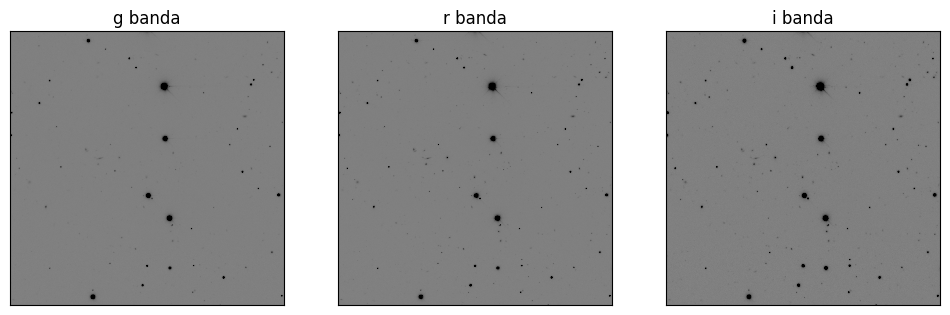

In [17]:
gimage2 = gimage-np.median(gimage)
rimage2 = rimage-np.median(rimage)
iimage2 = iimage-np.median(iimage)
img = make_lupton_rgb(iimage2, rimage2, gimage2, Q=10, stretch=30)
plot_images(images)

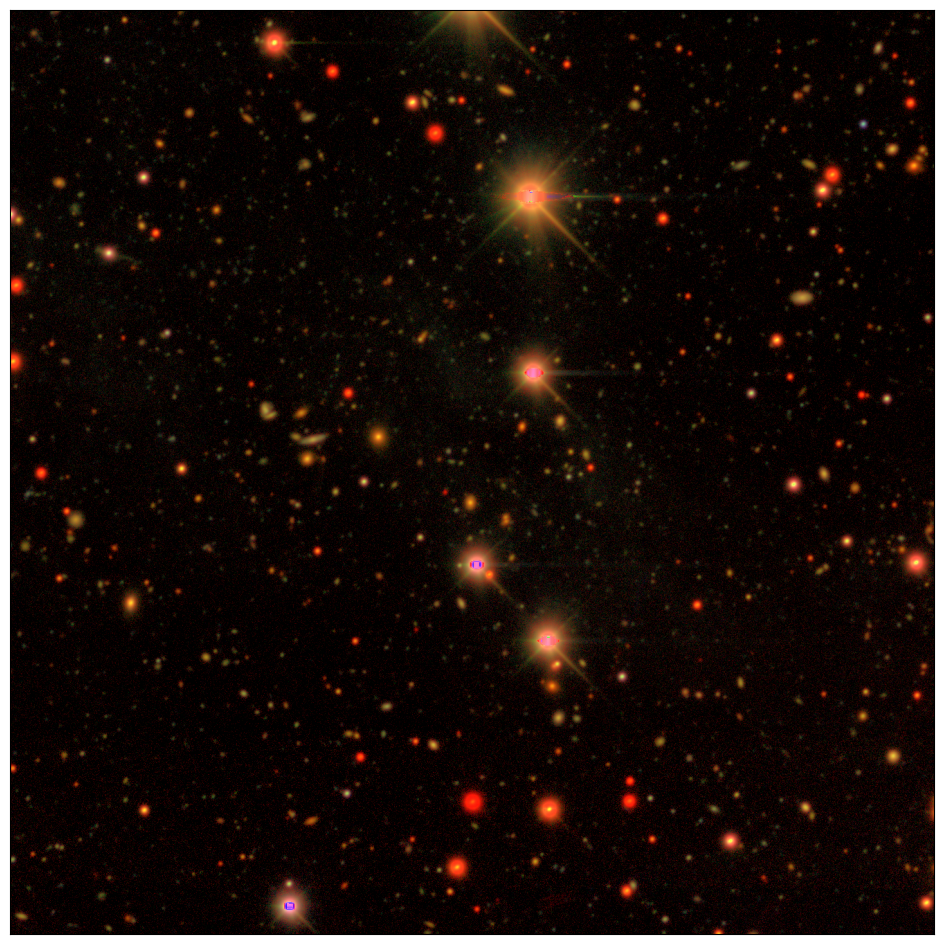

In [18]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(1,1,1)

ax.imshow(img,origin='lower')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)